Encuentra los vértices de mayor centralidad de la minired:

Usando la medida de centralidad de grado
Usando la medida de centralidad de eigenvector

Para la base de datos de la actividad de redes reales encuentra los vértices de mayor centralidad, usando centralidad de grado y centralidad de eigenvector.

En ambas redes, realiza un análisis: ¿qué se puede decir de los vértices de mayor centralidad? ¿tiene sentido que sean los de mayor centralidad? ¿cambian los vértices de mayor centralidad respecto a ambas medidas? Para los vértices que bajan de centralidad, ¿tienen centralidad baja sus vecinos? Para los vértices que aumentan su centralidad, ¿tienen centralidad alta sus vecinos?


# Mini Red


In [47]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as mcolors

In [48]:
from typing import List, Tuple

V: List[str] = [
    "AAPL", "MSFT", "NVDA", "AMZN", "GOOGL", "GOOG", "AVGO", "META", "TSLA", "BRK.B",
    "JPM", "V", "MA", "WMT", "COST", "ORCL", "LLY", "XOM", "JNJ", "PLTR",
    "BAC", "ABBV", "MU", "HD", "NFLX", "AMD", "PG", "GE", "CVX", "UNH"
]

E: List[Tuple[str, str]] = [
    # semiconductores / hardware / computo
    ("MU", "NVDA"),
    ("AVGO", "AAPL"),

    ("NVDA", "MSFT"), ("NVDA", "AMZN"), ("NVDA", "GOOG"), ("NVDA", "GOOGL"),
    ("NVDA", "ORCL"), ("NVDA", "META"), ("NVDA", "TSLA"),

    ("AMD", "AMZN"), ("AMD", "MSFT"), ("AMD", "ORCL"), ("AMD", "TSLA"),

    # nube / servicios
    ("AMZN", "NFLX"),
    ("AMZN", "XOM"), ("AMZN", "JNJ"), ("AMZN", "ABBV"),
    ("AMZN", "PLTR"),

    ("MSFT", "CVX"), ("MSFT", "GE"), ("MSFT", "UNH"),
    ("MSFT", "PLTR"),

    ("GOOGL", "PLTR"),
    ("ORCL", "PLTR"),

    # retail
    ("AAPL", "WMT"), ("AAPL", "COST"),
    ("PG", "WMT"),
    ("BRK.B", "WMT"),

    # pagos / tarjetas
    ("V", "COST"), ("V", "HD"), ("V", "BAC"),
    ("MA", "HD"), ("MA", "WMT"), ("MA", "AAPL"), ("MA", "BAC"),
    ("JPM", "AAPL"),

    # farmacia
    ("LLY", "AMZN"),
]

In [49]:
G = nx.DiGraph()
G.add_nodes_from(V)
G.add_edges_from(E)

In [ ]:
# Estaba muy fea, le dije a chat que lo separara

# def actividad(G1, topn):
#     deg_centralidades = nx.degree_centrality(G1)
#     eig_centralidades = nx.eigenvector_centrality(G1)

#     # normalizar para que sumen 1, para mejor interpretacion
#     s_deg = sum(deg_centralidades.values())
#     s_eig = sum(eig_centralidades.values())

#     deg_centralidades = {n: v / s_deg for n, v in deg_centralidades.items()} if s_deg != 0 else deg_centralidades
#     eig_centralidades = {n: v / s_eig for n, v in eig_centralidades.items()} if s_eig != 0 else eig_centralidades

#     deg_colors = np.array([deg_centralidades[n] for n in G1])
#     eig_sizes  = np.array([eig_centralidades[n] for n in G1])

#     diff = {n: abs(deg_centralidades[n] - eig_centralidades[n]) for n in G1.nodes()}
#     top10 = [n for n, v in sorted(diff.items(), key=lambda x: (x[1]), reverse=True)[:topn]]
#     top10_vals = np.array([diff[n] for n in top10])
#     top10_eig = np.array([eig_centralidades[n] for n in top10])
#     top10_deg = np.array([deg_centralidades[n] for n in top10])
#     top10_diff = np.array([diff[n] for n in top10])
    
#     pos = nx.kamada_kawai_layout(G1)
#     plt.figure(figsize=(24, 8))

#     plt.subplot(1, 3, 1)
#     nx.draw_networkx_edges(G1, pos, alpha=0.15, width=1.0)
#     nx.draw_networkx_nodes(G1, pos, nodelist=top10, node_size=50000*top10_eig,
#                         node_color=top10_eig, alpha=0.6)
#     nx.draw_networkx_labels(G1, pos, labels={n: n for n in top10}, font_size=8)
#     plt.title("Eigenvector")
#     plt.axis("off")

#     plt.subplot(1, 3, 2)
#     nx.draw_networkx_edges(G1, pos, alpha=0.15, width=1.0)
#     nx.draw_networkx_nodes(G1, pos, nodelist=top10, node_size=50000*top10_deg,
#                         node_color=top10_deg, alpha=0.6)
#     nx.draw_networkx_labels(G1, pos, labels={n: n for n in top10}, font_size=8)
#     plt.title("Degree")
#     plt.axis("off")

#     plt.subplot(1, 3, 3)
#     nx.draw_networkx_edges(G1, pos, alpha=0.15, width=1.0)
#     nx.draw_networkx_nodes(G1, pos, nodelist=top10, node_size=10000*np.abs(top10_diff),
#                         node_color=top10_diff, alpha=0.6)
#     nx.draw_networkx_labels(G1, pos, labels={n: n for n in top10}, font_size=8)
#     plt.title("Diff")
#     plt.axis("off")


#     plt.suptitle(f"Top {topn}")
#     plt.tight_layout()
#     plt.show()

    
#     df_top10 = (
#         pd.DataFrame({
#             "node": top10,
#             "eigenvector": [eig_centralidades[n] for n in top10],
#             "degree": [deg_centralidades[n] for n in top10],
#             "diff": [diff[n] for n in top10],
#         })
#         .reset_index(drop=True)
#     )

#     display(df_top10.style.format({
#         "eigenvector": f"{{:.2f}}",
#         "degree": f"{{:.2f}}",
#         "diff": f"{{:.2f}}",
#     }))




#     maxnode, maxdiff = max(diff.items(), key=lambda kv: abs(kv[1]))

#     SG4r1 = nx.ego_graph(G1, maxnode, radius=1)
#     SG4r2 = nx.ego_graph(G1, maxnode, radius=2)
#     SG4r3 = nx.ego_graph(G1, maxnode, radius=3)

#     L0 = {maxnode}
#     L1 = set(nx.ego_graph(G1, maxnode, radius=1).nodes()) - L0
#     L2 = set(nx.ego_graph(G1, maxnode, radius=2).nodes()) - L0 - L1
#     L3 = set(nx.ego_graph(G1, maxnode, radius=3).nodes()) - L0 - L1 - L2

#     reds = cm.get_cmap("Reds")
#     c0, c1, c2, c3 = reds(0.95), reds(0.77), reds(0.50), reds(0.10)

#     def layer_colors(subG):
#         cols = []
#         for n in subG.nodes():
#             if n in L0:   cols.append(c0)   # darkest
#             elif n in L1: cols.append(c1)
#             elif n in L2: cols.append(c2)
#             elif n in L3: cols.append(c3)   # lightest
#             else:         cols.append(mcolors.to_rgba("lightgray"))
#         return cols

#     plt.figure(figsize=(18, 6))

#     plt.subplot(1, 3, 1)
#     nx.draw_kamada_kawai(SG4r1, node_color=layer_colors(SG4r1), with_labels=True, font_size=8, alpha=0.9, node_size=1000)
#     plt.title(f"Nodo {maxnode} (radio=1)")
#     plt.axis("off")

#     plt.subplot(1, 3, 2)
#     nx.draw_kamada_kawai(SG4r2, node_color=layer_colors(SG4r2), with_labels=True, font_size=8, alpha=0.9)
#     plt.title(f"Nodo {maxnode} (radio=2)")
#     plt.axis("off")

#     plt.subplot(1, 3, 3)
#     nx.draw_kamada_kawai(SG4r3, node_color=layer_colors(SG4r3), with_labels=True, font_size=8, alpha=0.9)
#     plt.title(f"Nodo {maxnode} (radio=3)")
#     plt.axis("off")

#     plt.tight_layout()
#     plt.show()



#     last10 = [n for n, v in sorted(diff.items(), key=lambda x: (x[1]), reverse=False)[:topn]]


#     df_last10 = (
#         pd.DataFrame({
#             "node": last10,
#             "eigenvector": [eig_centralidades[n] for n in last10],
#             "degree": [deg_centralidades[n] for n in last10],
#             "diff": [diff[n] for n in last10],
#         })
#         .reset_index(drop=True)
#     )


#     last10_eig = np.array([eig_centralidades[n] for n in last10], dtype=float)
#     last10_eig = last10_eig.max() - last10_eig

#     last10_deg = np.array([deg_centralidades[n] for n in last10])
#     last10_deg = last10_deg.max() - last10_deg

#     last10_diff = np.array([diff[n] for n in last10])
#     last10_diff = last10_diff.max() - last10_diff

#     plt.figure(figsize=(18, 6))

#     plt.subplot(1, 3, 1)
#     nx.draw_networkx_edges(G1, pos, alpha=0.15, width=1.0)
#     nx.draw_networkx_nodes(G1, pos, nodelist=last10, node_size=50000*last10_eig,
#                         node_color=last10_eig, alpha=0.6)
#     nx.draw_networkx_labels(G1, pos, labels={n: n for n in last10}, font_size=8)
#     plt.title("Eigenvector")
#     plt.axis("off")

#     plt.subplot(1, 3, 2)
#     nx.draw_networkx_edges(G1, pos, alpha=0.15, width=1.0)
#     nx.draw_networkx_nodes(G1, pos, nodelist=last10, node_size=10000*last10_deg,
#                         node_color=last10_deg, alpha=0.6)
#     nx.draw_networkx_labels(G1, pos, labels={n: n for n in last10}, font_size=8)
#     plt.title("Degree")
#     plt.axis("off")

#     plt.subplot(1, 3, 3)
#     nx.draw_networkx_edges(G1, pos, alpha=0.15, width=1.0)
#     nx.draw_networkx_nodes(G1, pos, nodelist=last10, node_size=100000*np.abs(last10_diff),
#                         node_color=last10_diff, alpha=0.6)
#     nx.draw_networkx_labels(G1, pos, labels={n: n for n in last10}, font_size=8)
#     plt.title("Diff")
#     plt.axis("off")
    
#     plt.suptitle(f"Last {topn}")
#     plt.tight_layout()
#     plt.show()

#     display(df_last10.style.format({
#         "eigenvector": f"{{:.4f}}",
#         "degree": f"{{:.4f}}",
#         "diff": f"{{:.4f}}",
#     }))

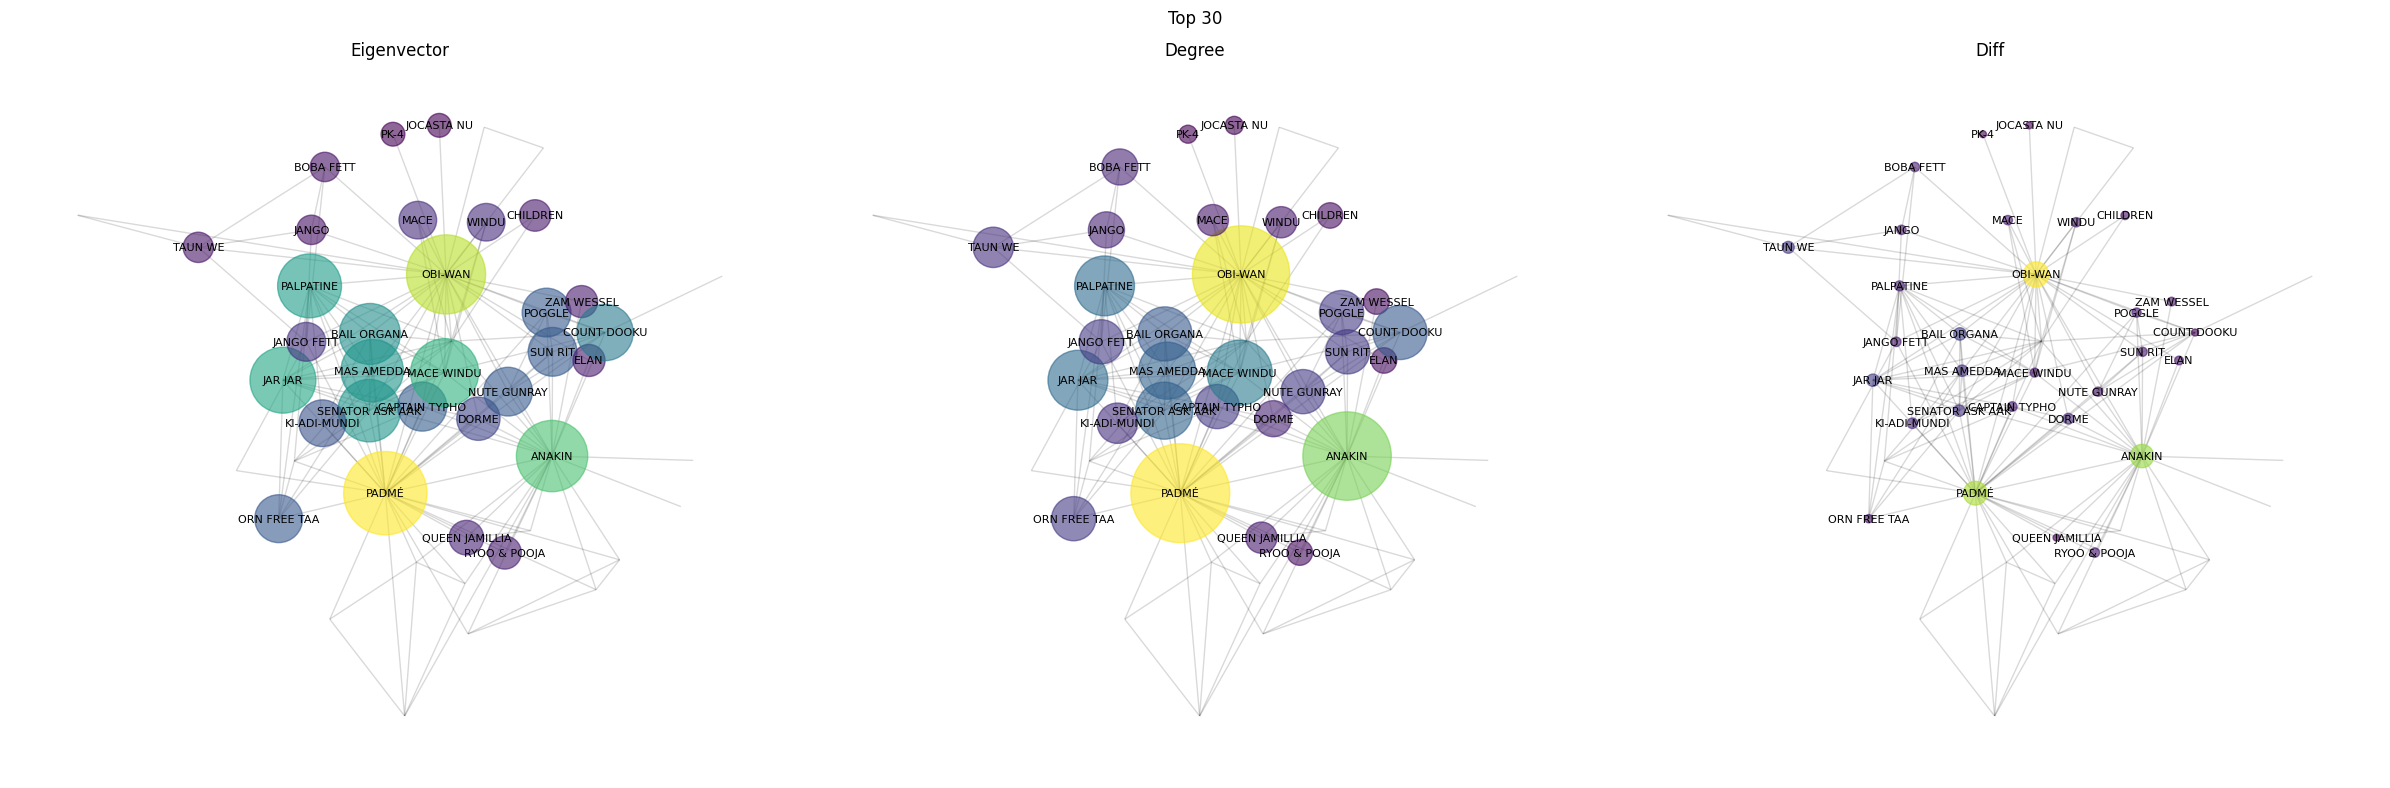

,node,eigenvector,degree,diff
0,OBI-WAN,0.06,0.10,0.03
1,PADMÉ,0.07,0.10,0.03
2,ANAKIN,0.05,0.08,0.03
3,BAIL ORGANA,0.04,0.03,0.01
4,JAR JAR,0.05,0.04,0.01
5,TAUN WE,0.01,0.02,0.01
6,MAS AMEDDA,0.04,0.03,0.01
7,SENATOR ASK AAK,0.04,0.03,0.01
8,DORME,0.02,0.01,0.01
9,KI-ADI-MUNDI,0.02,0.02,0.01


C:\Users\herie\AppData\Local\Temp\ipykernel_22924\1626112509.py:85: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  reds = cm.get_cmap("Reds")


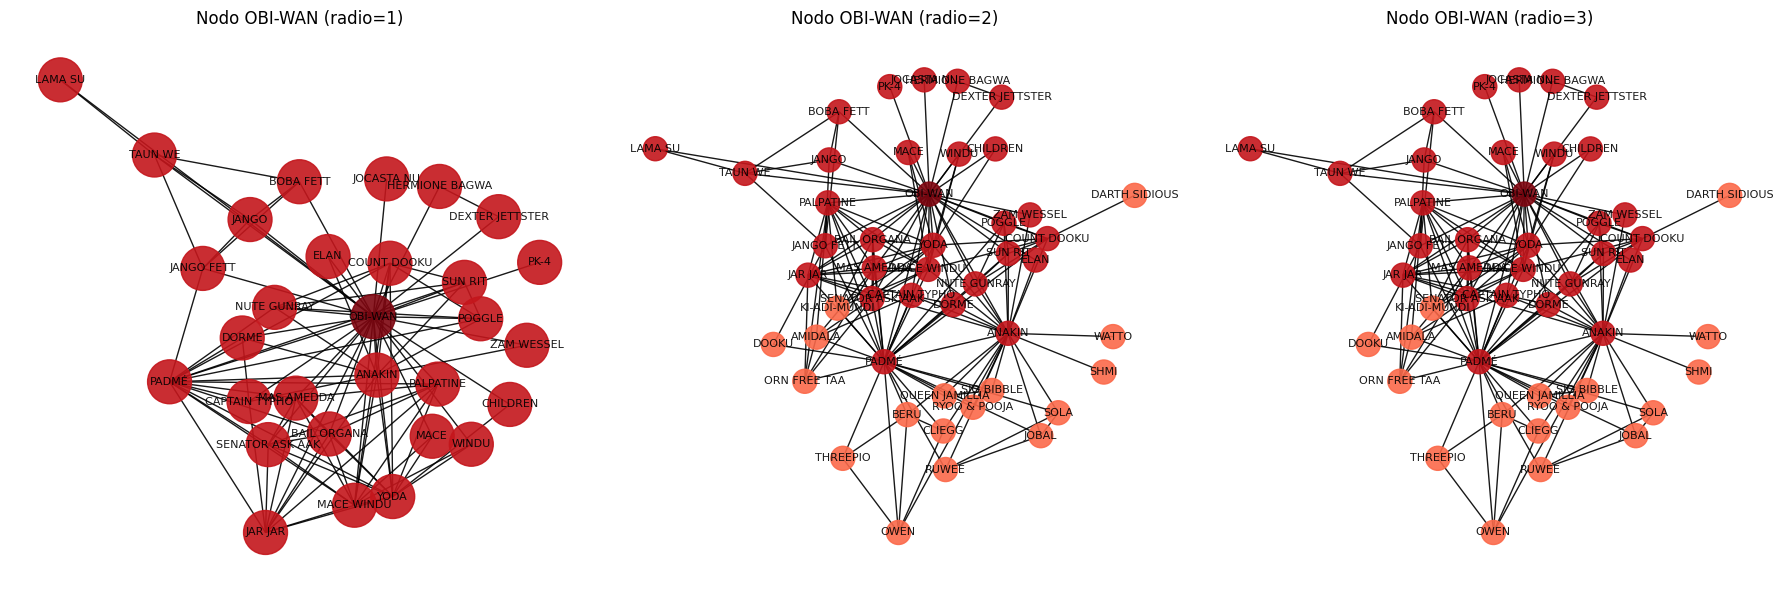

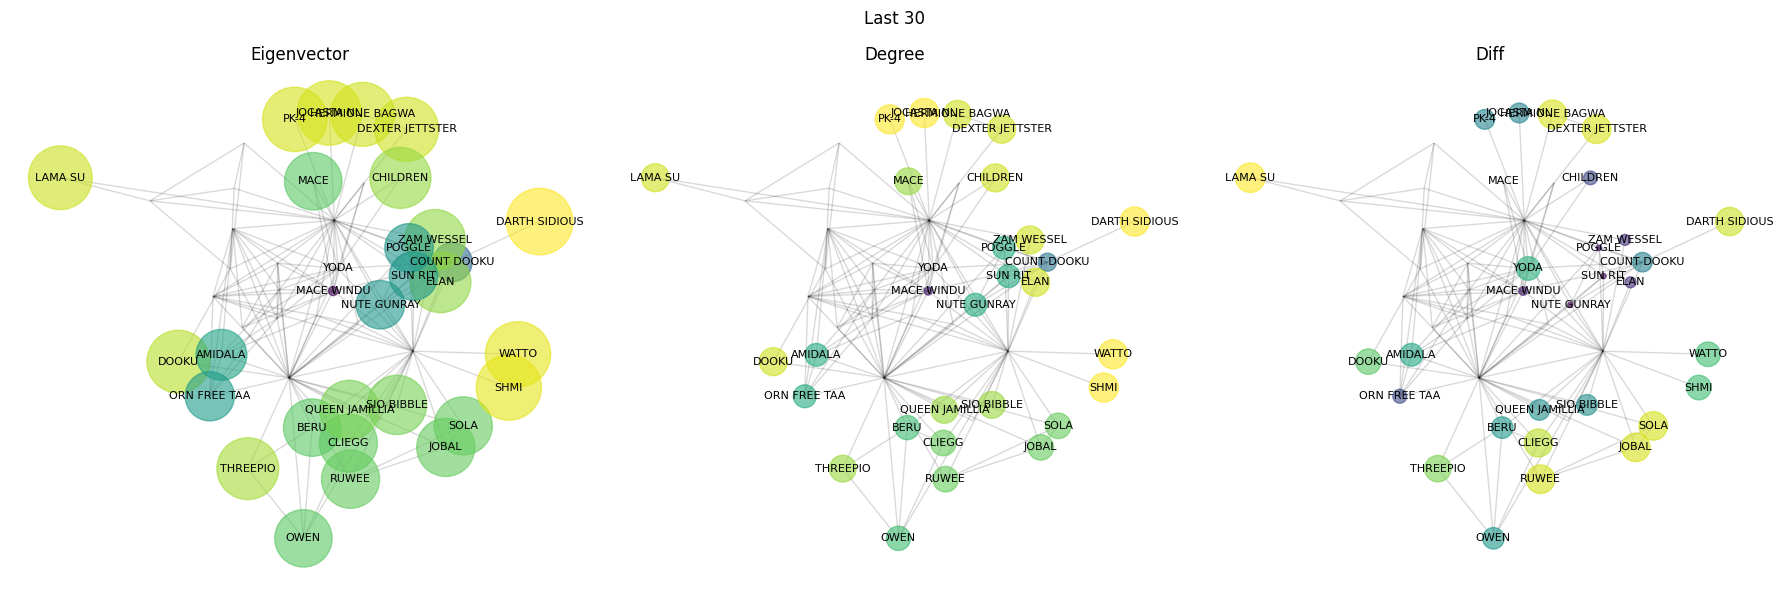

,node,eigenvector,degree,diff
0,LAMA SU,0.0067,0.0068,0.0000
1,DEXTER JETTSTER,0.0065,0.0068,0.0003
2,HERMIONE BAGWA,0.0065,0.0068,0.0003
3,JOBAL,0.0138,0.0135,0.0003
4,RUWEE,0.0138,0.0135,0.0003
5,SOLA,0.0138,0.0135,0.0003
6,DARTH SIDIOUS,0.0030,0.0034,0.0004
7,CLIEGG,0.0140,0.0135,0.0005
8,THREEPIO,0.0092,0.0101,0.0009
9,DOOKU,0.0079,0.0068,0.0012


In [40]:
actividad(G, topn=30)

In [53]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from IPython.display import display


def centralities_normalized(G):
    deg = nx.degree_centrality(G)
    eig = nx.eigenvector_centrality(G, tol=0.1, max_iter=300)

    s_deg = sum(deg.values())
    s_eig = sum(eig.values())

    if s_deg != 0:
        deg = {n: v / s_deg for n, v in deg.items()}
    if s_eig != 0:
        eig = {n: v / s_eig for n, v in eig.items()}

    return deg, eig


def diff_abs(deg, eig, nodes):
    return {n: abs(deg[n] - eig[n]) for n in nodes}


def topn_by_value(d, n, descending=True):
    return [k for k, v in sorted(d.items(), key=lambda kv: kv[1], reverse=descending)[:n]]


def nodes_to_array(d, nodes, dtype=float):
    return np.array([d[n] for n in nodes], dtype=dtype)


def pretty_table(nodes, deg, eig, diff, digits=4):
    df = (
        pd.DataFrame(
            {
                "node": nodes,
                "eigenvector": [eig[n] for n in nodes],
                "degree": [deg[n] for n in nodes],
                "diff": [diff[n] for n in nodes],
            }
        )
        .reset_index(drop=True)
    )

    display(
        df.style.format(
            {
                "eigenvector": f"{{:.{digits}f}}",
                "degree": f"{{:.{digits}f}}",
                "diff": f"{{:.{digits}f}}",
            }
        )
    )
    return df


def plot_highlighted_3panel(G, nodes, deg, eig, diff, pos=None, title="", figsize=(24, 8)):
    if pos is None:
        pos = nx.kamada_kawai_layout(G)

    eig_vals = nodes_to_array(eig, nodes)
    deg_vals = nodes_to_array(deg, nodes)
    dif_vals = nodes_to_array(diff, nodes)

    plt.figure(figsize=figsize)

    plt.subplot(1, 3, 1)
    nx.draw_networkx_edges(G, pos, alpha=0.15, width=1.0)
    nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_size=50000 * eig_vals, node_color=eig_vals, alpha=0.8, cmap=plt.cm.viridis)
    nx.draw_networkx_labels(G, pos, labels={n: n for n in nodes}, font_size=8)
    plt.title("Eigenvector")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    nx.draw_networkx_edges(G, pos, alpha=0.15, width=1.0)
    nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_size=50000 * deg_vals, node_color=deg_vals, alpha=0.8, cmap=plt.cm.viridis)
    nx.draw_networkx_labels(G, pos, labels={n: n for n in nodes}, font_size=8)
    plt.title("Degree")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    nx.draw_networkx_edges(G, pos, alpha=0.15, width=1.0)
    nx.draw_networkx_nodes(
        G, pos,
        nodelist=nodes,
        node_size=10000 * np.abs(dif_vals),     # safe sizes
        node_color=dif_vals,
        alpha=0.9,
        cmap=plt.cm.coolwarm
    )
    nx.draw_networkx_labels(G, pos, labels={n: n for n in nodes}, font_size=8)
    plt.title("Diff")
    plt.axis("off")

    if title:
        plt.suptitle(title)
    plt.tight_layout()
    plt.show()

    return pos


def maxnode_by_abs_diff(diff):
    return max(diff.items(), key=lambda kv: abs(kv[1]))  # (node, value)

def minnode_by_abs_diff(diff):
    return min(diff.items(), key=lambda kv: abs(kv[1]))  # (node, value)

def ego_layers(G, center, max_radius):
    layers = []
    prev = set()
    for r in range(0, max_radius + 1):
        nodes_r = set(nx.ego_graph(G, center, radius=r).nodes())
        layers.append(nodes_r - prev)  # exactly distance r
        prev = nodes_r
    return layers  # [L0, L1, ..., Lmax]


def layer_color_map(layers, cmap_name="Reds", stops=None, default="lightgray"):
    # stops: list of floats in [0,1] for each layer (0..R). Higher => darker in Reds.
    if stops is None:
        # for radius 3: [dark, ..., light]
        stops = np.linspace(0.95, 0.35, num=len(layers))

    cmap = cm.get_cmap(cmap_name)
    layer_to_color = {i: cmap(stops[i]) for i in range(len(layers))}

    node_to_layer = {}
    for i, L in enumerate(layers):
        for n in L:
            node_to_layer[n] = i

    def colors_for(subG):
        cols = []
        for n in subG.nodes():
            i = node_to_layer.get(n, None)
            cols.append(layer_to_color[i] if i is not None else mcolors.to_rgba(default))
        return cols

    return colors_for


def plot_ego_radii_3panel(G, center, radii=(1, 2, 3), layout="kamada_kawai", figsize=(18, 6)):
    max_r = max(radii)
    layers = ego_layers(G, center, max_r)
    colors_for = layer_color_map(layers, cmap_name="Reds")

    plt.figure(figsize=figsize)
    for i, r in enumerate(radii, start=1):
        SG = nx.ego_graph(G, center, radius=r)

        plt.subplot(1, 3, i)
        if layout == "circular":
            pos = nx.circular_layout(SG)
            nx.draw(SG, pos, node_color=colors_for(SG), with_labels=True, font_size=8)
        else:
            nx.draw_kamada_kawai(SG, node_color=colors_for(SG), with_labels=True, font_size=8)

        plt.title(f"Nodo {center} (radio={r})")
        plt.axis("off")

    plt.tight_layout()
    plt.show()


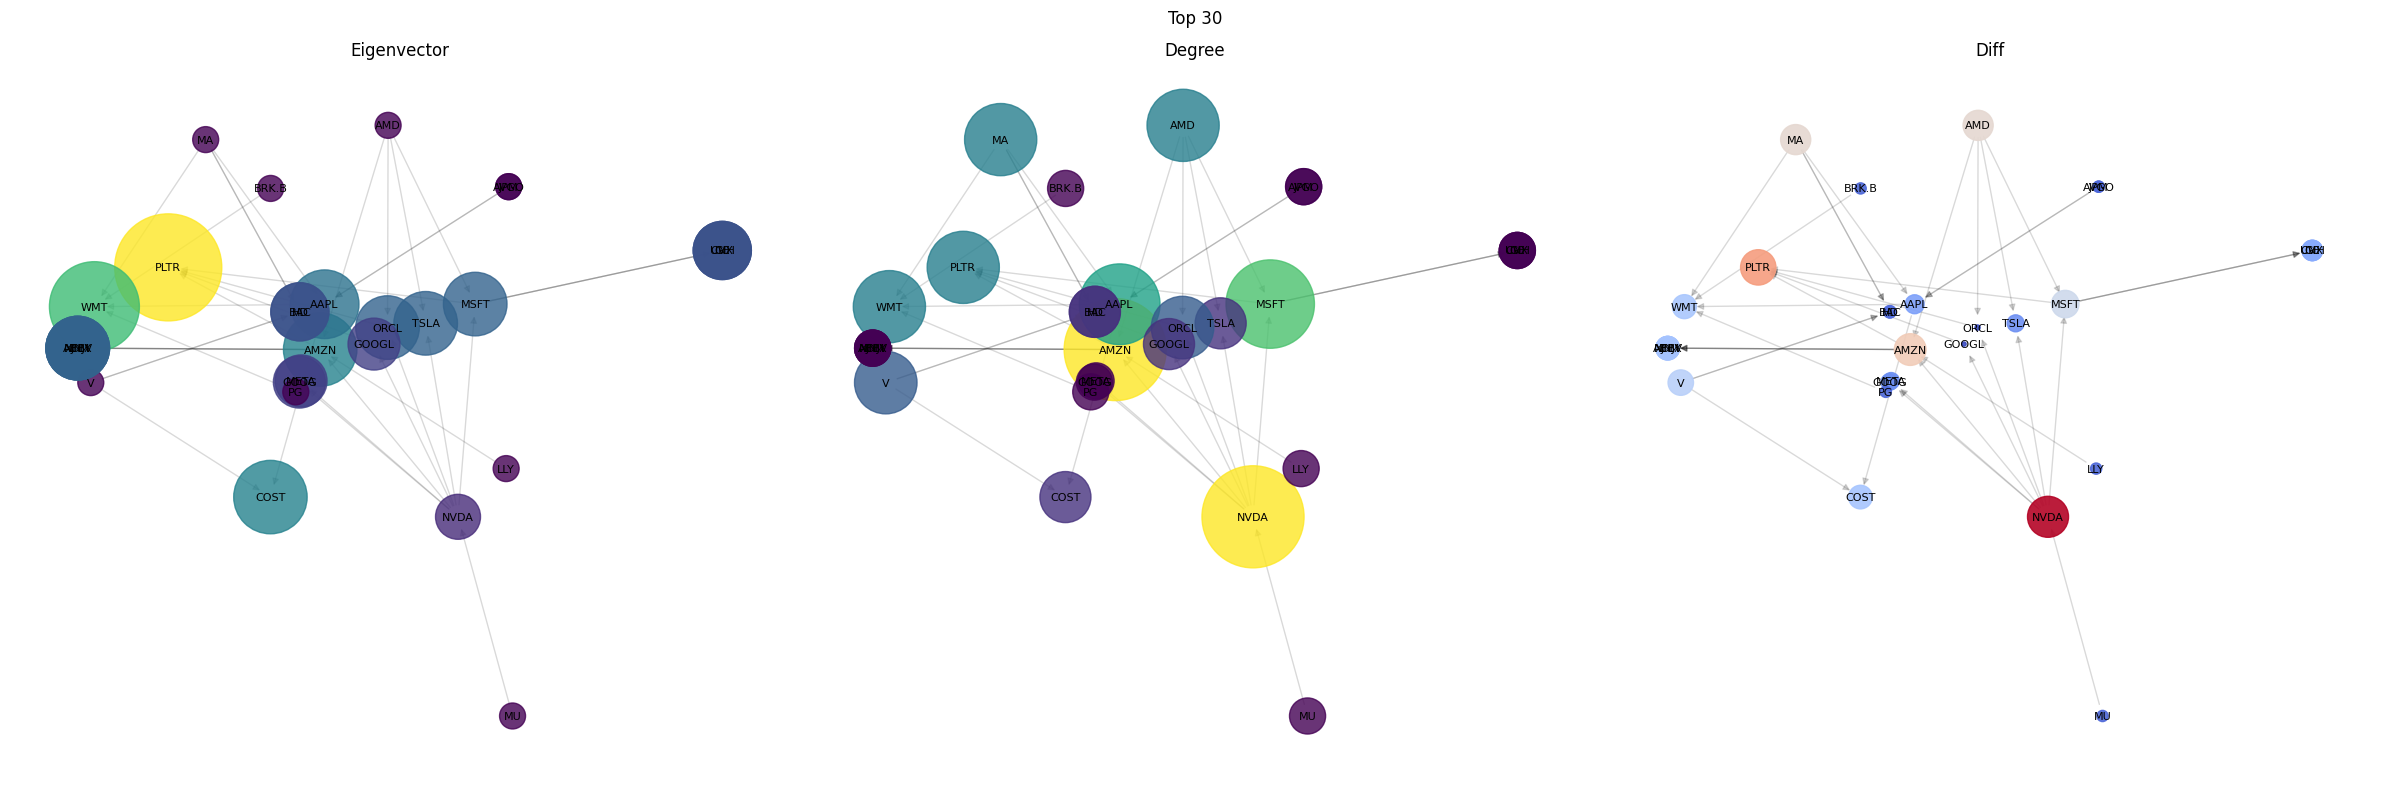

,node,eigenvector,degree,diff
0,NVDA,0.02,0.11,0.09
1,PLTR,0.12,0.05,0.06
2,AMZN,0.06,0.11,0.05
3,MA,0.01,0.05,0.05
4,AMD,0.01,0.05,0.05
5,MSFT,0.04,0.08,0.04
6,V,0.01,0.04,0.03
7,WMT,0.08,0.05,0.03
8,COST,0.06,0.03,0.03
9,XOM,0.04,0.01,0.03


C:\Users\herie\AppData\Local\Temp\ipykernel_22924\1972529025.py:130: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(cmap_name)


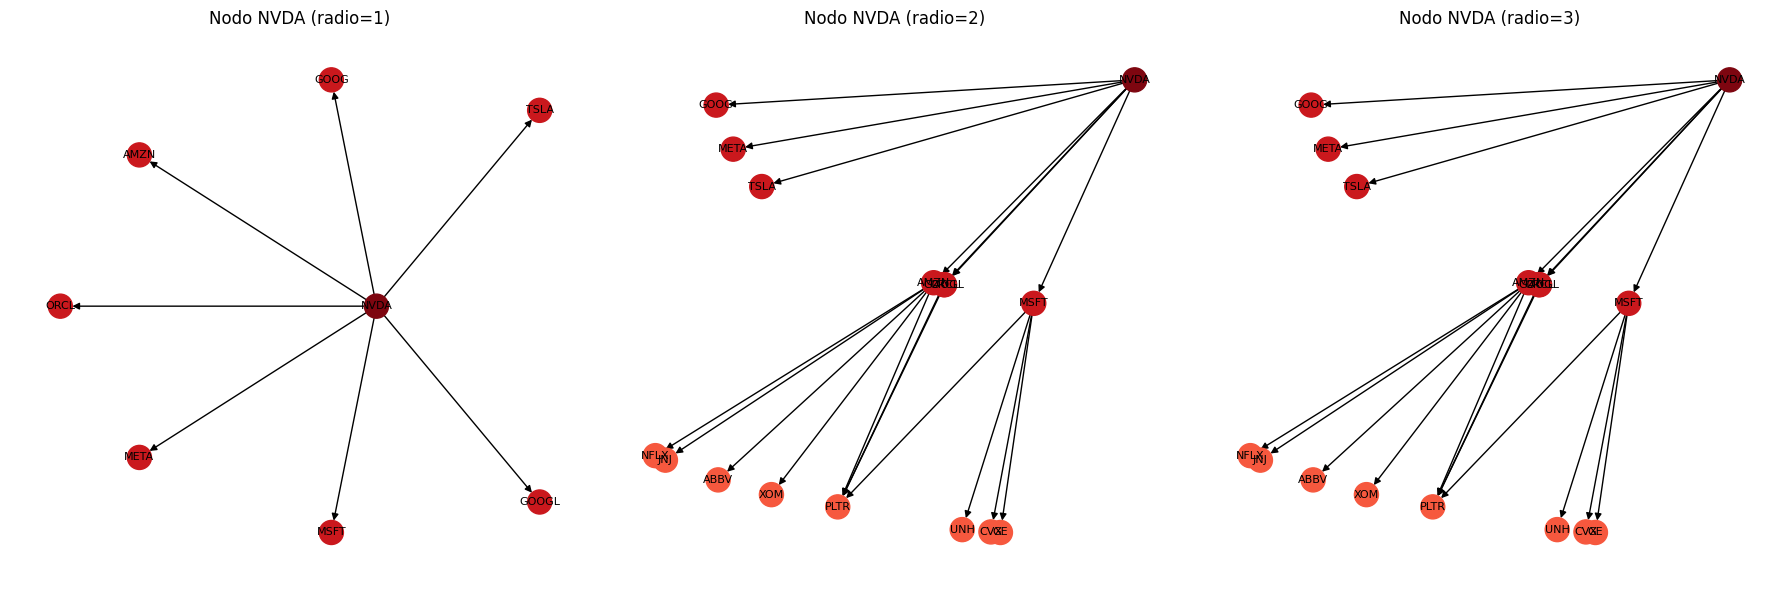

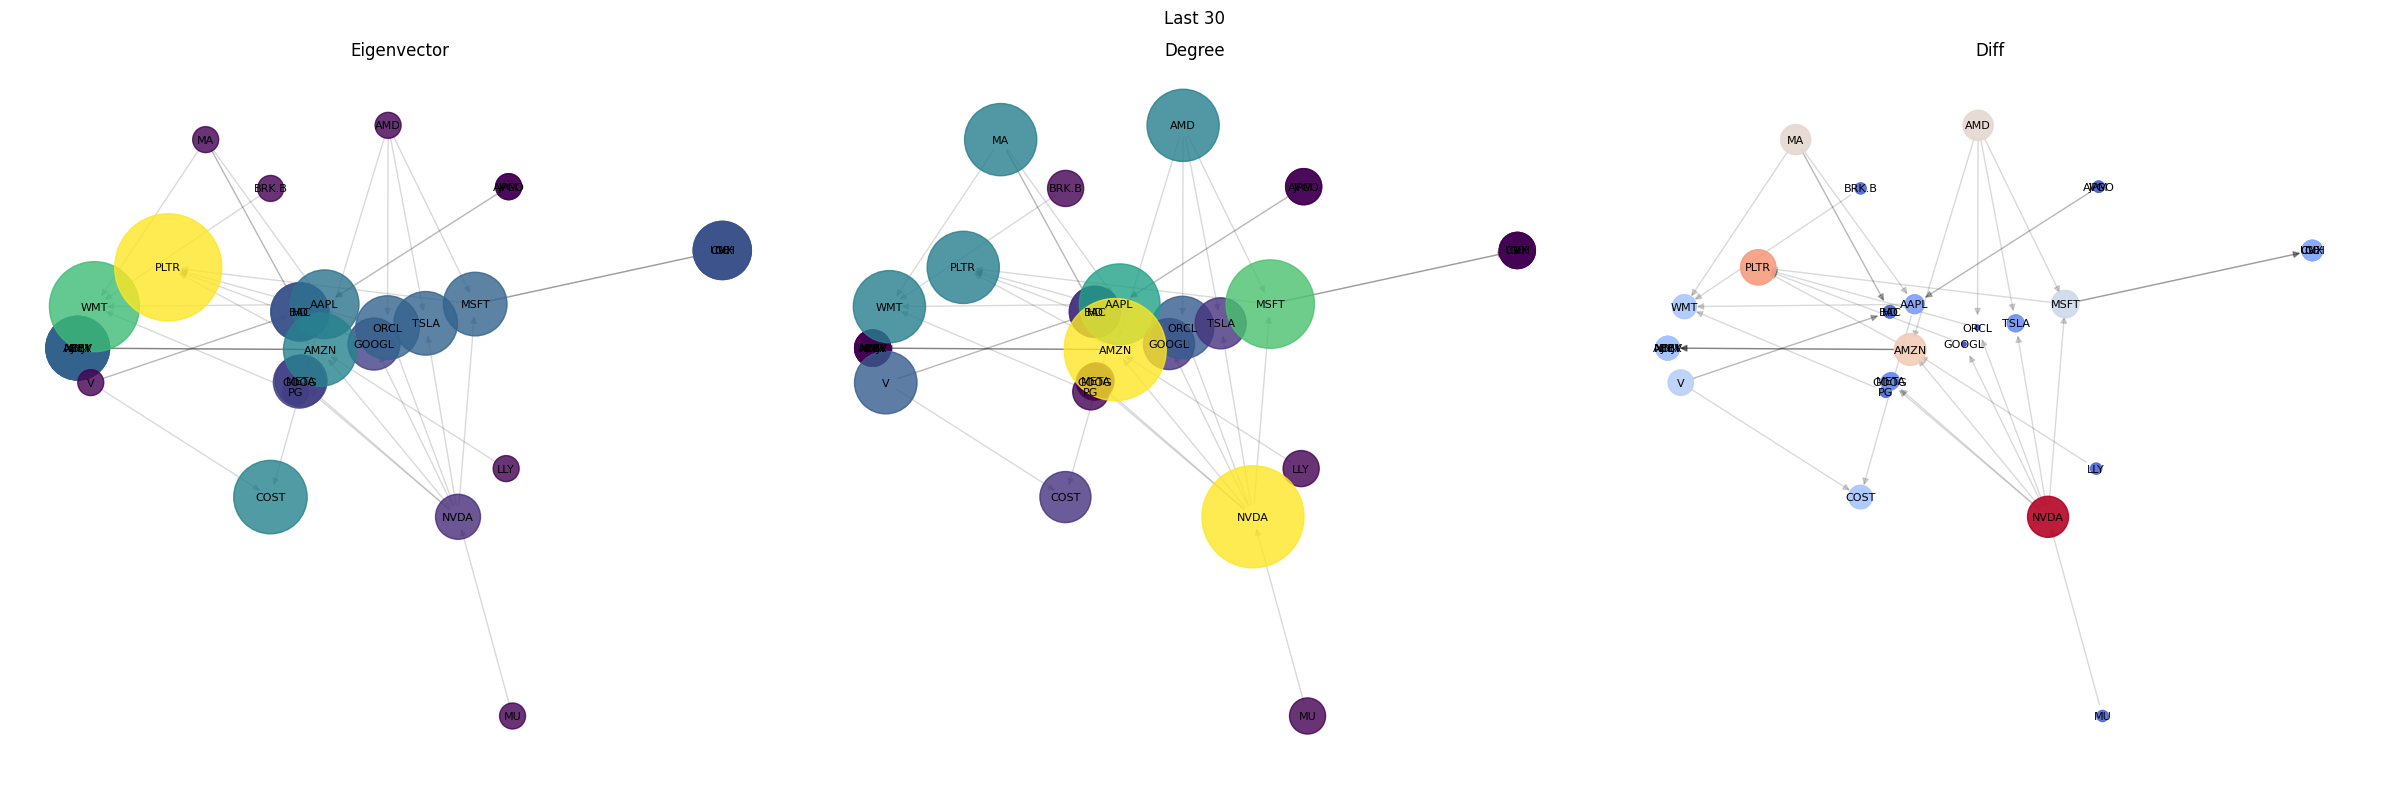

,node,eigenvector,degree,diff
0,GOOGL,0.0280,0.0270,0.0009
1,ORCL,0.0420,0.0405,0.0014
2,AVGO,0.0070,0.0135,0.0065
3,BRK.B,0.0070,0.0135,0.0065
4,JPM,0.0070,0.0135,0.0065
5,LLY,0.0070,0.0135,0.0065
6,MU,0.0070,0.0135,0.0065
7,PG,0.0070,0.0135,0.0065
8,BAC,0.0350,0.0270,0.0079
9,HD,0.0350,0.0270,0.0079


In [56]:
topn = 30
G1 = G
deg, eig = centralities_normalized(G1)
diff = diff_abs(deg, eig, G1.nodes())

top_nodes = topn_by_value(diff, topn, descending=True)
pos = plot_highlighted_3panel(G1, top_nodes, deg, eig, diff, title=f"Top {topn}")
df_top = pretty_table(top_nodes, deg, eig, diff, digits=2)

maxnode, maxdiff = maxnode_by_abs_diff(diff)
plot_ego_radii_3panel(G1, maxnode, radii=(1, 2, 3), layout="kamada_kawai")

last_nodes = topn_by_value(diff, topn, descending=False)
plot_highlighted_3panel(G1, last_nodes, deg, eig, diff, pos=pos, title=f"Last {topn}")
df_last = pretty_table(last_nodes, deg, eig, diff, digits=4)


minnode: GOOGL diff: 0.0009450009450009504


C:\Users\herie\AppData\Local\Temp\ipykernel_22924\1972529025.py:130: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(cmap_name)


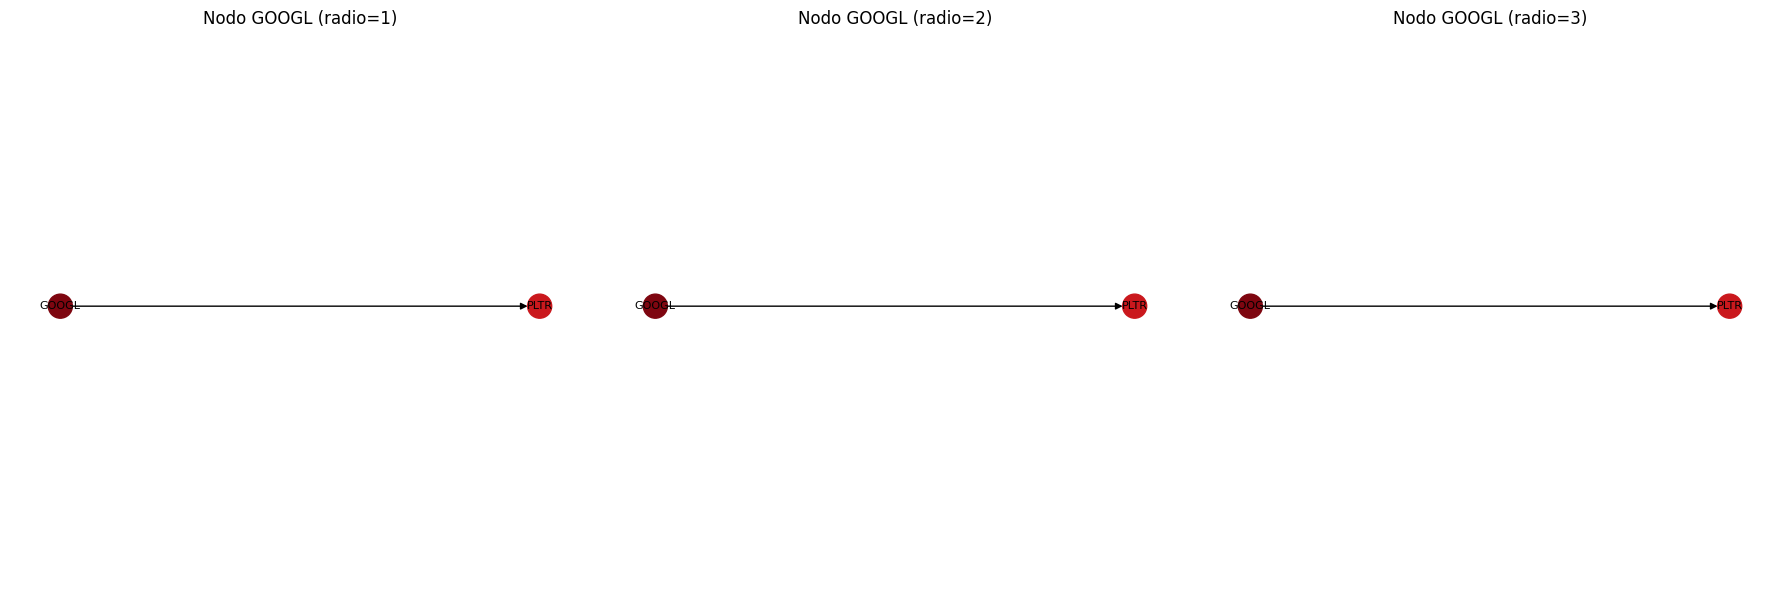

In [55]:
def minnode_by_abs_diff(diff):
    return min(diff.items(), key=lambda kv: abs(kv[1]))  # (node, value)

minnode, mindiff = minnode_by_abs_diff(diff)
print("minnode:", minnode, "diff:", mindiff)

plot_ego_radii_3panel(G1, minnode, radii=(1, 2, 3), layout="kamada_kawai")


# Red Real


In [1]:
from typing import List, Tuple
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

BLUES = plt.cm.rainbow

In [2]:
folder = Path("data/dataverse/gexf")
movie_id = 774
fp = folder / f"{movie_id}.gexf"

G = nx.read_gexf(fp, node_type=int)
print("loaded", movie_id, "| Nodos:", G.number_of_nodes(),
      "| Aristas:", G.number_of_edges())

loaded 774 | Nodos: 47 | Aristas: 148


In [3]:
def relabel_nodes_from_attr(
    G: nx.Graph,
    *,
    attr: str = "label",
    fallback_to_id: bool = True,
    make_unique: bool = True,
    copy: bool = True,
) -> nx.Graph:
    """
    Renombra nodos usando G.nodes[n][attr] (p.ej. 'label').
    - make_unique=True agrega sufijos ' (#2)' si hay nombres repetidos.
    """
    base_names = {}
    for n, d in G.nodes(data=True):
        name = d.get(attr)
        if name in (None, "") and fallback_to_id:
            name = str(n)
        base_names[n] = str(name)

    if make_unique:
        counts = {}
        mapping = {}
        for n, nm in base_names.items():
            k = counts.get(nm, 0) + 1
            counts[nm] = k
            mapping[n] = nm if k == 1 else f"{nm} (#{k})"
    else:
        mapping = base_names

    return nx.relabel_nodes(G, mapping, copy=copy)

G = relabel_nodes_from_attr(G, attr="label", make_unique=True, copy=True)

In [4]:
actividad(G, topn=30)

NameError: name 'actividad' is not defined